In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, 
                           precision_score, recall_score, f1_score, 
                           roc_auc_score, roc_curve, accuracy_score)
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("BINARY CLASSIFICATION WITH LOGISTIC REGRESSION")
print("Dataset: Breast Cancer Wisconsin (Diagnostic)")


# 1. LOAD AND EXPLORE THE DATASET
print("\n1. LOADING AND EXPLORING THE DATASET")


# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='diagnosis')

print(f"Dataset shape: {X.shape}")
print(f"Features: {X.shape[1]} features")
print(f"Samples: {X.shape[0]} samples")
print(f"\nTarget distribution:")
print(f"Malignant (0): {sum(y == 0)} samples")
print(f"Benign (1): {sum(y == 1)} samples")

# Display first few rows
print(f"\nFirst 5 rows of features:")
print(X.head())

print(f"\nFeature statistics:")
print(X.describe().round(2))

BINARY CLASSIFICATION WITH LOGISTIC REGRESSION
Dataset: Breast Cancer Wisconsin (Diagnostic)

1. LOADING AND EXPLORING THE DATASET
Dataset shape: (569, 30)
Features: 30 features
Samples: 569 samples

Target distribution:
Malignant (0): 212 samples
Benign (1): 357 samples

First 5 rows of features:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990


2. DATA VISUALIZATION


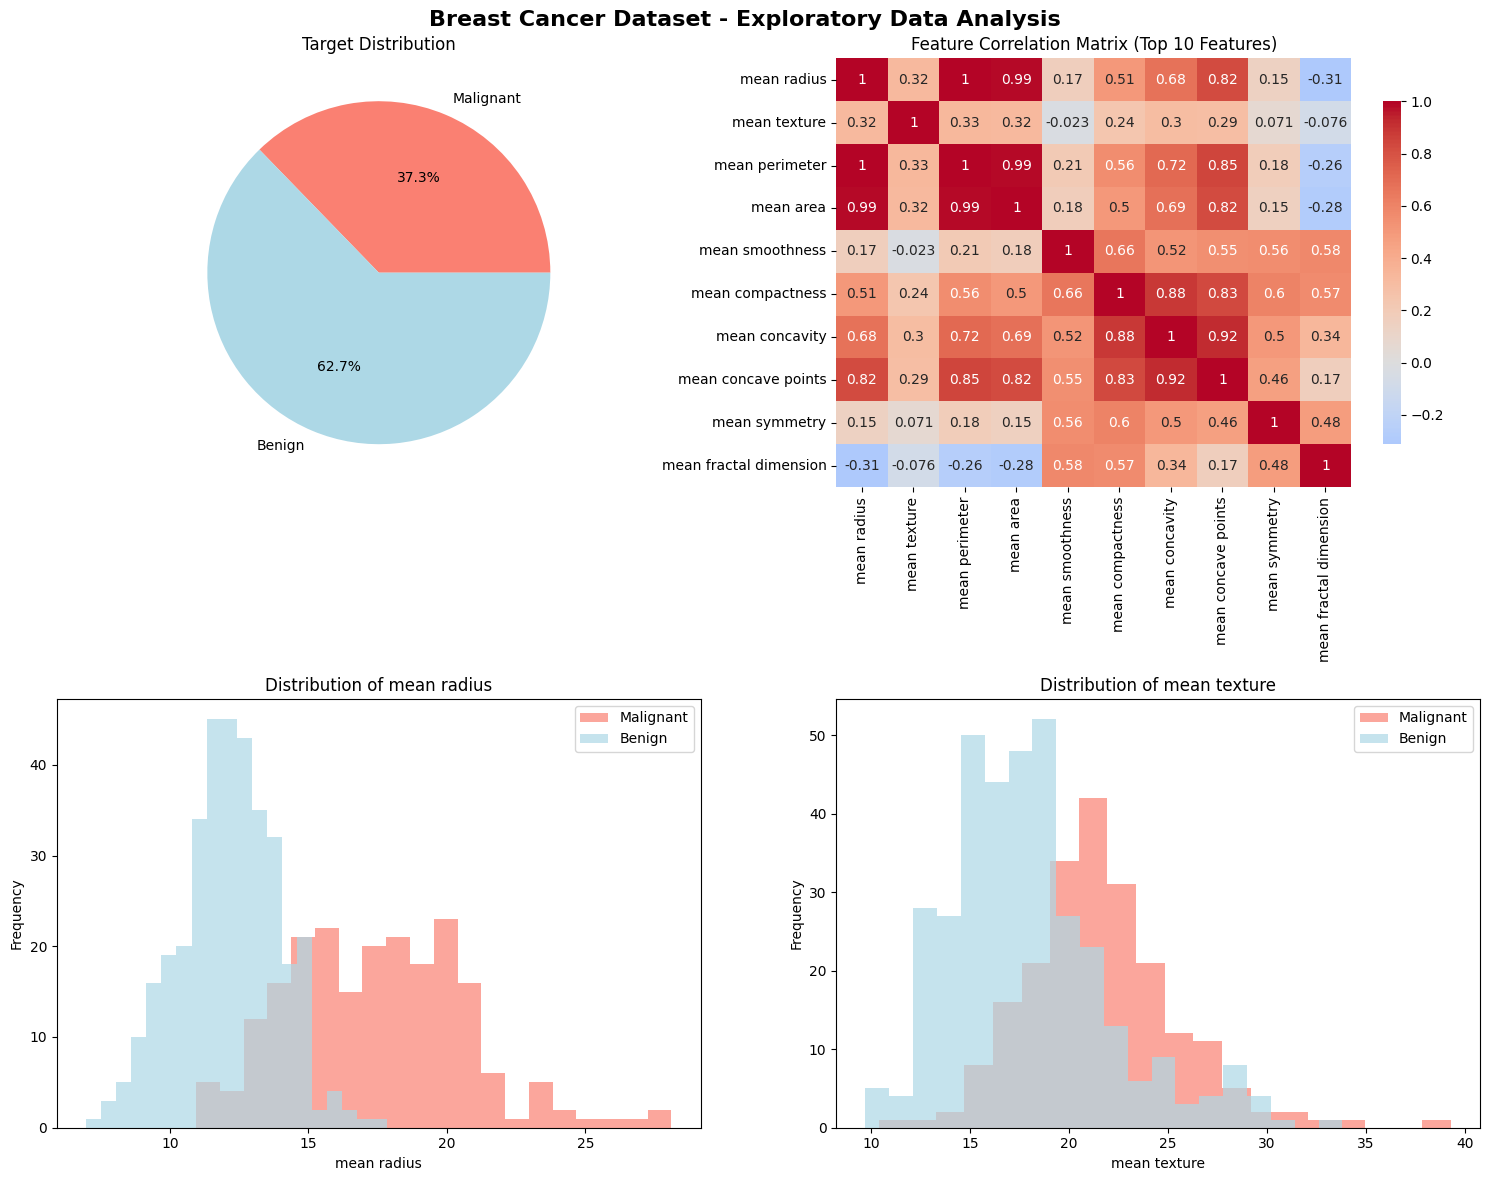

In [2]:
print("\n2. DATA VISUALIZATION")


# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Breast Cancer Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Target distribution
axes[0, 0].pie([sum(y == 0), sum(y == 1)], 
               labels=['Malignant', 'Benign'], 
               autopct='%1.1f%%', 
               colors=['salmon', 'lightblue'])
axes[0, 0].set_title('Target Distribution')

# Plot 2: Feature correlation heatmap (top 10 features)
top_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 
                'mean smoothness', 'mean compactness', 'mean concavity', 
                'mean concave points', 'mean symmetry', 'mean fractal dimension']
corr_matrix = X[top_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            ax=axes[0, 1], cbar_kws={'shrink': 0.8})
axes[0, 1].set_title('Feature Correlation Matrix (Top 10 Features)')

# Plot 3: Distribution of key features
key_features = ['mean radius', 'mean texture', 'mean area', 'mean smoothness']
for i, feature in enumerate(key_features):
    if i < 2:
        ax = axes[1, i]
        # Separate data by diagnosis
        malignant_data = X[y == 0][feature]
        benign_data = X[y == 1][feature]
        
        ax.hist(malignant_data, alpha=0.7, label='Malignant', color='salmon', bins=20)
        ax.hist(benign_data, alpha=0.7, label='Benign', color='lightblue', bins=20)
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
        ax.legend()

plt.tight_layout()
plt.show()

In [3]:
print("\n3. DATA PREPROCESSING")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Features standardized successfully")
print(f"Training features mean: {X_train_scaled.mean():.6f}")
print(f"Training features std: {X_train_scaled.std():.6f}")


3. DATA PREPROCESSING
Training set size: 455 samples
Test set size: 114 samples
Features standardized successfully
Training features mean: -0.000000
Training features std: 1.000000


In [4]:
print("\n4. LOGISTIC REGRESSION MODEL")

# Create and train the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

print(f"Model trained successfully")
print(f"Model coefficients shape: {log_reg.coef_.shape}")
print(f"Model intercept: {log_reg.intercept_[0]:.4f}")


4. LOGISTIC REGRESSION MODEL
Model trained successfully
Model coefficients shape: (1, 30)
Model intercept: 0.3022


In [5]:
print("\n5. MODEL EVALUATION")

# Basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

# Detailed classification report
print(f"\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))



5. MODEL EVALUATION
Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1-Score: 0.9861
ROC-AUC: 0.9954

Confusion Matrix:
[[41  1]
 [ 1 71]]

Detailed Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.98      0.98        42
      Benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114




6. MODEL EVALUATION VISUALIZATIONS
----------------------------------------


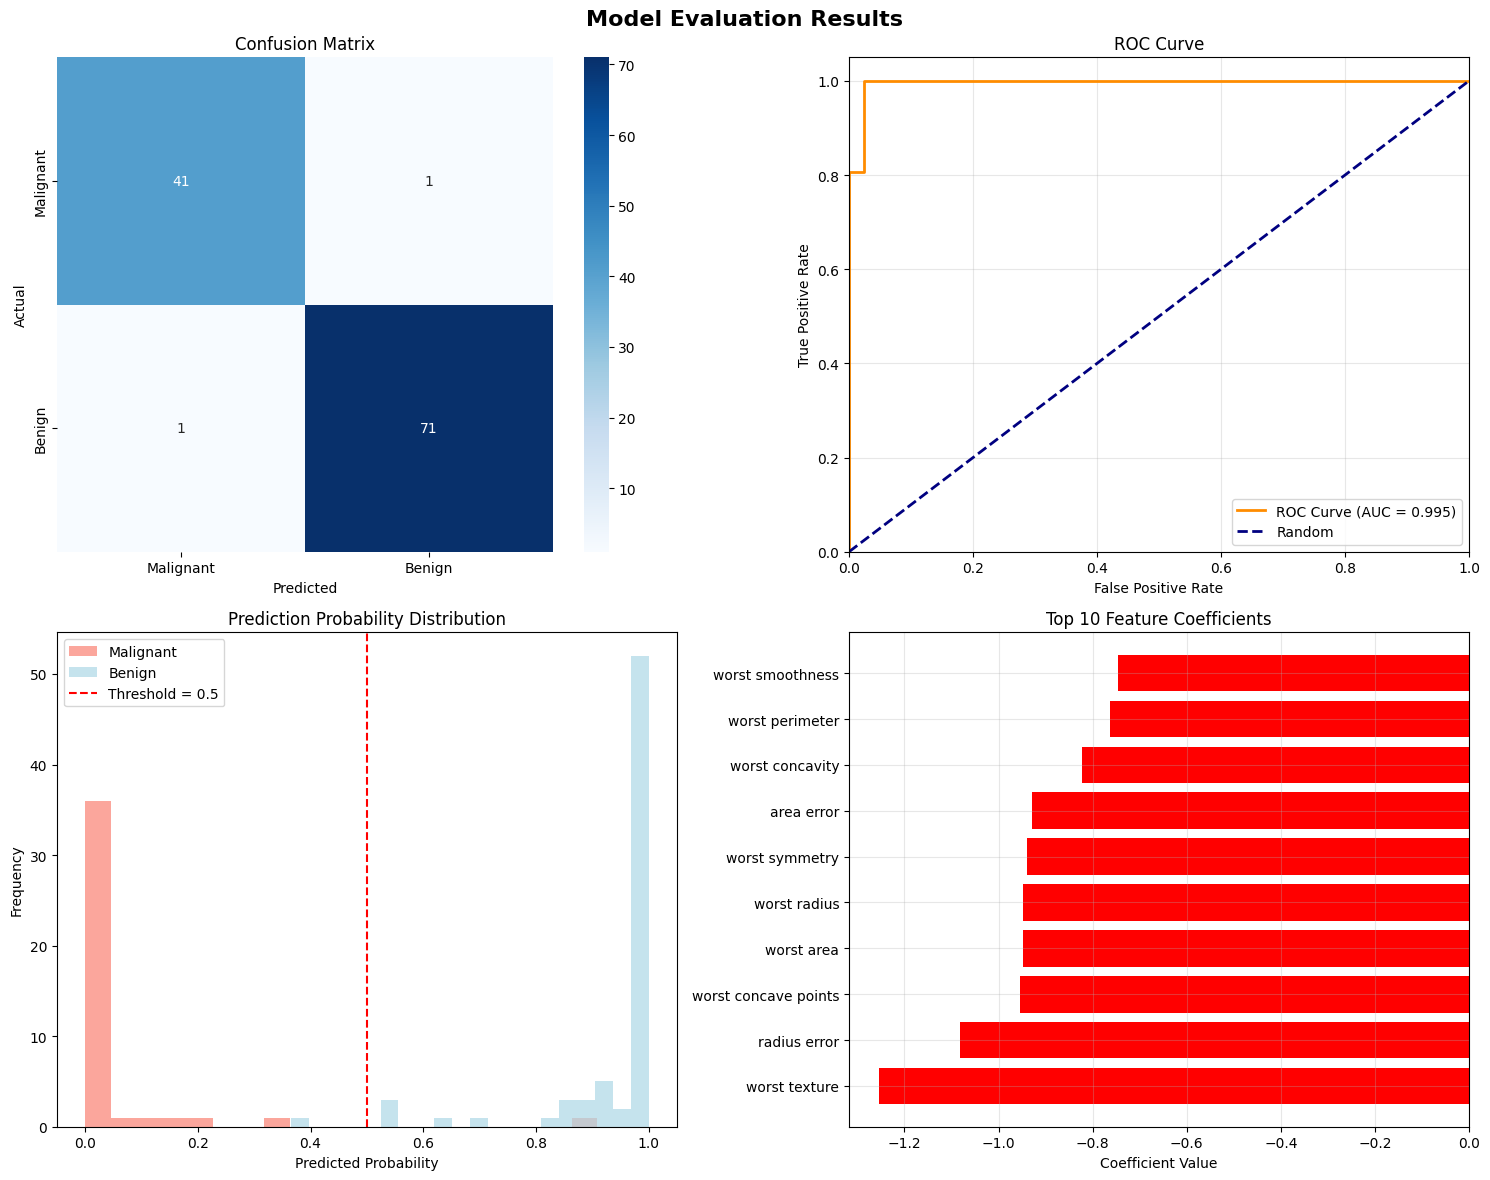

In [6]:
print("\n6. MODEL EVALUATION VISUALIZATIONS")
print("-" * 40)

# Create evaluation plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Evaluation Results', fontsize=16, fontweight='bold')

# Plot 1: Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'],
            ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Plot 2: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Prediction Probability Distribution
axes[1, 0].hist(y_pred_proba[y_test == 0], alpha=0.7, label='Malignant', 
                color='salmon', bins=20)
axes[1, 0].hist(y_pred_proba[y_test == 1], alpha=0.7, label='Benign', 
                color='lightblue', bins=20)
axes[1, 0].axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')
axes[1, 0].set_title('Prediction Probability Distribution')
axes[1, 0].set_xlabel('Predicted Probability')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Plot 4: Feature Importance (Top 10 coefficients)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg.coef_[0]
})
feature_importance['abs_coefficient'] = abs(feature_importance['coefficient'])
top_features_imp = feature_importance.nlargest(10, 'abs_coefficient')

colors = ['red' if x < 0 else 'blue' for x in top_features_imp['coefficient']]
axes[1, 1].barh(range(len(top_features_imp)), top_features_imp['coefficient'], color=colors)
axes[1, 1].set_yticks(range(len(top_features_imp)))
axes[1, 1].set_yticklabels([f.replace('mean ', '') for f in top_features_imp['feature']])
axes[1, 1].set_title('Top 10 Feature Coefficients')
axes[1, 1].set_xlabel('Coefficient Value')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


7. UNDERSTANDING THE SIGMOID FUNCTION


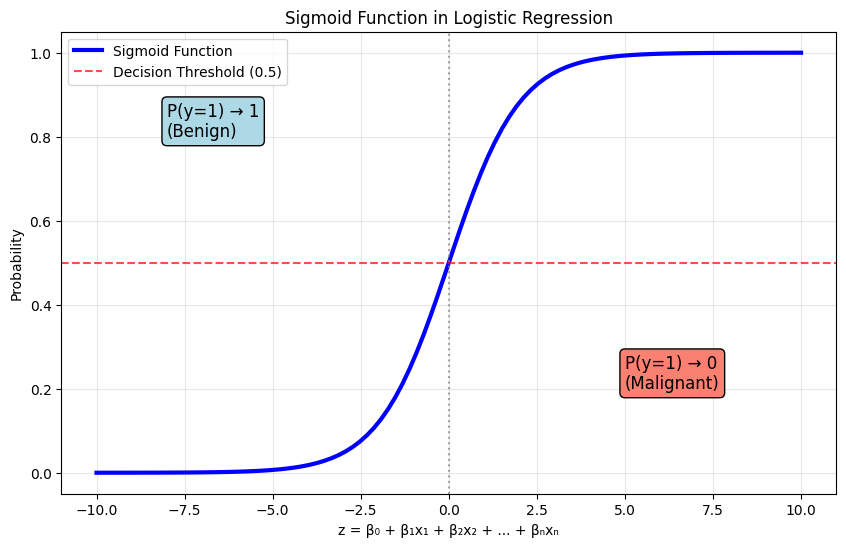

The sigmoid function maps any real number to a value between 0 and 1,
making it perfect for probability estimation in binary classification.
Formula: σ(z) = 1 / (1 + e^(-z))
Where z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ


In [7]:
print("\n7. UNDERSTANDING THE SIGMOID FUNCTION")

# Plot the sigmoid function
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, 'b-', linewidth=3, label='Sigmoid Function')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
plt.axvline(x=0, color='gray', linestyle=':', alpha=0.7)
plt.xlabel('z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ')
plt.ylabel('Probability')
plt.title('Sigmoid Function in Logistic Regression')
plt.grid(True, alpha=0.3)
plt.legend()
plt.text(-8, 0.8, 'P(y=1) → 1\n(Benign)', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.text(5, 0.2, 'P(y=1) → 0\n(Malignant)', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="salmon"))
plt.show()

print("The sigmoid function maps any real number to a value between 0 and 1,")
print("making it perfect for probability estimation in binary classification.")
print("Formula: σ(z) = 1 / (1 + e^(-z))")
print("Where z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ")



8. THRESHOLD TUNING


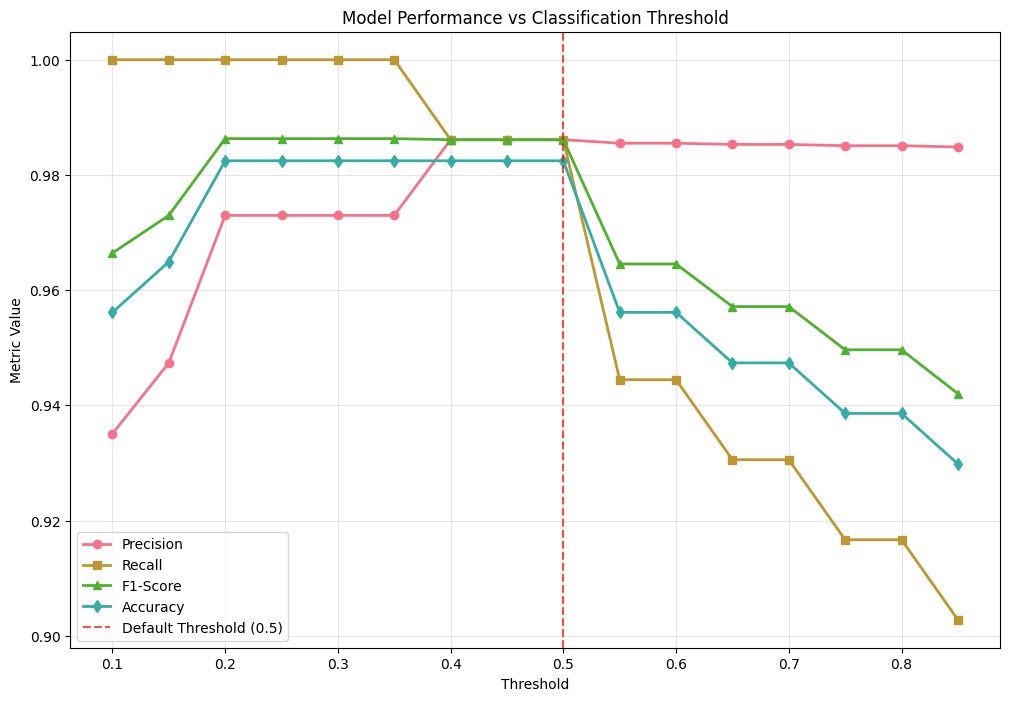

Optimal threshold based on F1-score: 0.20
F1-score at optimal threshold: 0.9863

9. FINAL MODEL SUMMARY

MODEL PERFORMANCE SUMMARY:
Accuracy: 98.2%
Precision: 98.6%
Recall: 98.6%
F1-Score: 98.6%
ROC-AUC: 99.5%

BUSINESS INTERPRETATION:
Out of 100 predictions, 98 are correct
When model predicts 'Benign', it's right 99% of the time
Model catches 99% of all actual benign cases
ROC-AUC of 0.995 indicates excellent discrimination ability

KEY INSIGHTS:
The model shows excellent performance with ROC-AUC > 0.95
High precision and recall indicate reliable predictions
Feature standardization was crucial for logistic regression
The dataset is well-suited for binary classification


In [8]:
print("\n8. THRESHOLD TUNING")

# Calculate metrics for different thresholds
thresholds_to_test = np.arange(0.1, 0.9, 0.05)
metrics_df = []

for threshold in thresholds_to_test:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    precision_thresh = precision_score(y_test, y_pred_thresh)
    recall_thresh = recall_score(y_test, y_pred_thresh)
    f1_thresh = f1_score(y_test, y_pred_thresh)
    accuracy_thresh = accuracy_score(y_test, y_pred_thresh)
    
    metrics_df.append({
        'threshold': threshold,
        'precision': precision_thresh,
        'recall': recall_thresh,
        'f1_score': f1_thresh,
        'accuracy': accuracy_thresh
    })

metrics_df = pd.DataFrame(metrics_df)

# Plot threshold tuning results
plt.figure(figsize=(12, 8))
plt.plot(metrics_df['threshold'], metrics_df['precision'], 'o-', label='Precision', linewidth=2)
plt.plot(metrics_df['threshold'], metrics_df['recall'], 's-', label='Recall', linewidth=2)
plt.plot(metrics_df['threshold'], metrics_df['f1_score'], '^-', label='F1-Score', linewidth=2)
plt.plot(metrics_df['threshold'], metrics_df['accuracy'], 'd-', label='Accuracy', linewidth=2)
plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='Default Threshold (0.5)')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Model Performance vs Classification Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find optimal threshold based on F1-score
optimal_threshold = metrics_df.loc[metrics_df['f1_score'].idxmax(), 'threshold']
optimal_f1 = metrics_df['f1_score'].max()

print(f"Optimal threshold based on F1-score: {optimal_threshold:.2f}")
print(f"F1-score at optimal threshold: {optimal_f1:.4f}")

# 9. FINAL MODEL SUMMARY
print("\n9. FINAL MODEL SUMMARY")


print(f"\nMODEL PERFORMANCE SUMMARY:")
print(f"Accuracy: {accuracy:.1%}")
print(f"Precision: {precision:.1%}")
print(f"Recall: {recall:.1%}")
print(f"F1-Score: {f1:.1%}")
print(f"ROC-AUC: {roc_auc:.1%}")

print(f"\nBUSINESS INTERPRETATION:")
print(f"Out of 100 predictions, {accuracy*100:.0f} are correct")
print(f"When model predicts 'Benign', it's right {precision*100:.0f}% of the time")
print(f"Model catches {recall*100:.0f}% of all actual benign cases")
print(f"ROC-AUC of {roc_auc:.3f} indicates excellent discrimination ability")

print(f"\nKEY INSIGHTS:")
print(f"The model shows excellent performance with ROC-AUC > 0.95")
print(f"High precision and recall indicate reliable predictions")
print(f"Feature standardization was crucial for logistic regression")
print(f"The dataset is well-suited for binary classification")